# Unidad 7: Complejidad computacional


[7.1 Más allá del correcto funcionamiento](#sec7.1)

[7.2 La eficiencia de los programas](#sec7.2)

[7.3 Tiempo de ejecución de un programa](#sec7.3)

[7.4 El peor caso](#sec7.4)

[7.5 Modelando la complejidad computacional](#sec7.5)

[7.6 Niveles de complejidad](#sec7.6)

[7.7 Búsqueda y ordenamiento](#sec7.7)

<a id='sec7.1'></a>

## 7.1 Más allá del correcto funcionamiento

Cuando uno está aprendiendo a programar, el reto principal es lograr desarrollar algoritmos y programas que den solución a los problemas que se plantean sin incurrir en errores, es decir, que el algoritmo realmente haga lo que uno espera de él, nada más, nada menos. Dicho de otra manera, que su semántica o funcionalidad sea correcta. Si mi algoritmo debe listar todos los números primos menores que 10, no puede faltar ninguno ni puede incluirse un número que no sea primo.

Garantizar que un programa no cometerá ningún error es en la mayoría de los casos imposible, como se discute en la Unidad 6, sin embargo, el correcto funcionamiento de un programa es quizás el objetivo principal que tiene, desde un programador principiante hasta una empresa grande de software.

A pesar del esfuerzo que requiere lograr que un algoritmo funcione correctamente, el desafío de la programación no termina ahí. Los programas deben ser también eficientes en el uso del tiempo, es decir, deben ser rápidos. En casos extremos pero comunes, la velocidad de un programa determinará también su correcto funcionamiento. Si el programa que calcula la inclinación que deben tener los alerones y la potencia del motor de un avión, se toma más tiempo del requerido, posiblemente el avión se accidentará y obviamente podremos decir que el programa no funcionó correctamente. Este tipo de sistemas se conocen como sistemas de tiempo real, ya que existen límites de tiempo para los procesos computacionales.

En otro lugar diferente del universo de los programas, son comunes situaciones en las que la cantidad de trabajo computacional que debe hacer el programa para producir resultados es tan grande, que el tiempo requerido resulta exagerado. Este es el caso por ejemplo de la bioinformática, donde con frecuencia los programas deben hacer análisis tan extensos sobre bancos de datos de ADN tan grandes, que incluso al ejecutarse en computadores muy poderosos, los tiempos de ejecución llegan a ser de meses o incluso años. En muchos de esos casos simplemente los análisis no se hacen pues no resulta viable esperar tanto tiempo. Situaciones similares se encuentran en otros escenarios de simulación computacional, como en la meteorología, la astrofísica, las neurociencias, la economía, entre otros.

<a id='sec7.2'></a>


## 7.2 La eficiencia de los programas

La eficiencia es un concepto que nos habla de la cantidad de recursos que se consumen para llevar a cabo una tarea. Si tengo poco dinero y mi objetivo es desplazarme a la universidad, hacerlo en metro será eficiente, hacerlo en bicicleta lo será aún más y por el contrario, coger un taxi, no logrará un manejo eficiente del dinero que tengo. Si hablamos de algoritmos o programas, uno que desarrolla un proceso en menor tiempo que otro está haciendo un uso más eficiente del recurso tiempo.

Aunque la eficiencia de los programas abarca además del tiempo, el uso de memoria, el consumo de energía, entre otros, aquí vamos a limitarnos a analizar la eficiencia en el uso del tiempo de los algoritmos.

El *Código 7.1* muestra un algoritmo de búsqueda por fuerza bruta que determina si el dato `e` está contenido en la lista `L`. Si la lista tiene 1024 elementos, las búsquedas tomarán en el peor caso 1024 iteraciones del ciclo, esto es, cuando el dato buscado no se encuentra.

** Código 7.1**

In [29]:
def linear_search(L, e):
    found = False
    while i < len(L): 
        if e == L[mid]:
            found = True
            break
    return found

El *Código 7.2* muestra un algoritmo con el mismo propósito pero que utiliza la estrategia de búsqueda binaria asumiendo que los datos están ordenados. Para la misma lista de 1024 elementos, la búsqueda tomará 10 iteraciones, $ \log_2 (1024) $ .

** Código 7.2 **

In [30]:
def binary_search(L, e):
    found = False
    lo = 0
    hi = len(L) - 1
    while lo <= hi: 
        mid = (hi + lo) // 2
        if e > L[mid]:
            lo = mid + 1
        elif e < L[mid]:
            hi = mid - 1
        else:
            found = True
            break
    return found

La comparación de estos dos algoritmos es una muestra del compromiso que normalmente existe entre la complejidad computacional y la complejidad conceptual, o dicho de otra manera, entre la velocidad de ejecución y la dificultad de concebir e implementar un algoritmo. Evidentemente, el algoritmo del *Código 7.1* es más fácil de entender e implementar mientras que el del *Código 7.2* es más eficiente al ejecutarse.

Aquí es importante anotar también, que no siempre el algoritmo más rápido es el que debe utilizarse; quizás cueste más dinero, consume más energía o es más difícil de integrarlo al resto del programa. Las prioridades de la aplicación dictarán entonces el criterio a utilizar para tomar una decisión.

<a id='sec7.3'></a>

## 7.3 Tiempo de ejecución de un programa

*¿Cuánto se demora un programa dado en ejecutarse?* Tomemos por ejemplo el *Código 7.3*, donde se muestra un algoritmo que calcula el factorial de un número entero positivo.

** Código 7.3 **

In [31]:
def fact(n):
    ans = 1
    while n >= 1:
        ans *= n
        n -= 1
    return ans

Obviamente, no tenemos suficiente información para responder la pregunta ya que el tiempo de ejecución de esta función va a depender de:

* La velocidad del computador
* La calidad del traductor
* El valor de `n`

La velocidad del computador va a depender principalmente de qué otros programas se estén ejecutando simultáneamente y de las características del hardware (más que todo, la potencia del procesador). La calidad del traductor (intérprete o compilador) dependerá de la habilidad que éste tenga para generar código de máquina eficiente. El estudio de estos dos factores pertenece al campo de la arquitectura de computadores y de los compiladores, y por lo tanto, está fuera del alcance de este documento. 

Por otro lado, la influencia que tienen los datos de entrada sobre el tiempo de ejecución del programa, puede analizarse independientemente de los otros dos factores, enfocándose únicamente en el algoritmo. Para lograr esto, debemos transformar la medida de tiempo de ejecución en una medida de complejidad computacional (cantidad de trabajo computacional). En lugar de segundos, vamos entonces a utilizar las operaciones básicas como unidad de complejidad computacional, que en todo caso, va a depender de los datos de entrada.

Descartando entonces los factores referentes a la velocidad del computador y a la calidad del traductor, podemos decir que la complejidad computacional de la función `fact` en el *Código 7.3* es directamente proporcional a `n`.


<a id='sec7.4'></a>

## 7.4 El peor caso

Si nos referimos de nuevo al *Código 7.1*, veremos que su complejidad computacional depende no sólo de la longitud de la lista `L`, si no también del lugar donde se encuentra el dato buscado. Si está al principio de la lista, el algoritmo terminará su trabajo rápidamente, si está por el medio se demorará más y si está al final o no está en absoluto tendremos el peor caso. Así las cosas, podemos identificar las siguientes situaciones para cualquier algoritmo:

* **Mejor caso**: Es cuando las características de los datos de entrada (para un tamaño fijo) favorecen más el tiempo de ejecución.
* **Peor caso**: Es el generado por las condiciones promedio de las entradas.
* **Caso promedio**: Es cuando las características de los datos de entrada (para un tamaño fijo) generan el peor tiempo de ejecución.

En el análisis de la complejidad computacional nos interesa considerar el peor caso ya que los resultados nos permiten dar garantías o cotas superiores acerca de la complejidad computacional.


<a id='sec7.5'></a>

## 7.5 Modelando la complejidad computacional

Para expresar matemáticamente el trabajo computacional que hace un algoritmo, podemos ahora construir una función matemática que dependerá de los datos de entrada.

La Figura 7.1 muestra de nuevo la función para calcular el factorial de un número. En este caso hemos anotado la cantidad de operaciones básicas que se hacen en cada línea de código. Para el ejemplo mostrado podemos contar 7 operaciones. Sin embargo, es importante observar que las 5 operaciones del medio hacen parte de un ciclo, lo cual quiere decir que se repetirán múltiples veces. De hecho, es fácil analizar el algoritmo para concluir que estas instrucciones se repetirán `n` veces.

**Figura 7.1**

![fact](images/fact.png)

De esta manera podemos decir que la cantidad de trabajo computacional está determinado por:

\begin{equation*}
2 + 5n
\end{equation*}

Además, para valores muy grandes de n, podemos hacer la siguiente aproximación

\begin{equation*}
2 + 5n \approx 5n \text{  para  }  n \gg 0
\end{equation*}

Concluimos entonces que la constante aditiva (el 2 en este caso) se puede eliminar al hacer la aproximación. *¿Podemos hacer lo mismo con la constante multiplicativa?*
La Figura 7.2 muestra dos algoritmos para calcular la raíz cuadrada aproximada de un número real, uno por fuerza bruta y el otro por el método de bisección. Si nos concentramos solamente en las operaciones que se repiten, es decir, aquellas que pertenecen a un ciclo, veremos que el de fuerza bruta tiene 9, mientras que el de bisección tiene 10, lo cual es de esperarse debido a la mayor complejidad conceptual de este último algoritmo. Sin embargo, la Figura 7.2 muestra también que si ejecutamos ambas funciones con valores de pruebas medianamente altos, mientras que el de fuerza bruta requiere $ 10^{9} $ iteraciones, el de bisección necesita solo 20. Esta dramática diferencia nos permite concluir que la constante multiplicativa en este tipo de modelo se vuelve despreciable cuando los datos de entrada empiezan a crecer, que es precisamente cuando el análisis de complejidad computacional es relevante.

**Figura 7.2**

![sqrt-function](images/sqrt-function.png)

Así, en el ejemplo anterior podemos decir que $$ 5n \approx n \text{ para } n \gg 0 $$

Veamos ahora cómo analizar un algoritmo que contiene varios ciclos y cuyo modelo ya no es un polinomio de primer grado como el ejemplo anterior, si no de un grado mayor.

La Figura 7.3 muestra una función que se compone de tres ciclos `for`, uno tras otro. El primero hace siempre 1000 operaciones, el segundo hace `x` operaciones y el tercero hace $ 2x^{2} $  operaciones. La Figura 7.3 muestra también el resultado de ejecutar varias veces la función `f` para valores crecientes de `x`. Aunque para valores pequeños de `x`, el primer ciclo es el que domina la cantidad de trabajo hecho, a medida que `x` crece es evidente que el tercer ciclo es el que predomina por un amplio margen y el resto del código se hace despreciable. Debido a que nuestro interés, como se ha dicho, es analizar el trabajo computacional a medida que los datos de entrada crecen, vamos a adoptar esta simplificación como regla general.


**Figura 7.3**

![function-f](images/function-f.png)

En el ejemplo de la Figura 7.3 podemos decir entonces que $$ 1000 + x + 2x^{2} \approx x^{2} \text { para } x \gg 0 $$

Esta simplificación la denominaremos complejidad computacional asintótica y nos dice cómo aumenta la cantidad de trabajo computacional a medida que crecen los datos de entrada.

Para representar la complejidad computacional asintótica se utiliza por convención la letra $ O $ mayúscula así

\begin{equation}
O(f(x)) = O(x^{2})
\end{equation}

De la expresión anterior entendemos que la complejidad computacional asintótica del algoritmo en cuestión es cuadrática con respecto al valor de `x`.

<a id='sec7.6'></a>

## 7.6 Niveles de complejidad

El análisis de complejidad computacional nos permite dos cosas principalmente. En primer lugar, nos permite medir la escalabilidad de un algoritmo con respecto a los datos de entrada, tal como ya se explicó. Y en segundo lugar, nos ofrece la posibilidad de comparar algoritmos y así utilizar la comparación como criterio a la hora seleccionar uno para alguna aplicación específica.

Vale la pena recordar, que la complejidad computacional, y en especial la asintótica, no es útil para determinar con precisión la cantidad de trabajo computacional de un algoritmo, ni mucho menos su tiempo de ejecución.

A continuación, veamos ejemplos de varios algoritmos que exhiben diferentes comportamientos en su complejidad computacional, empezando por los de menor complejidad y llegando a algunos de los más complejos.

### Complejidad constante
Los algoritmos de complejidad constante son del mínimo interés práctico pero es importante identificar su existencia y lugar dentro de los diferentes niveles de complejidad computacional.


** Código 7.4 **

In [32]:
def fcon(x):
    global _comp # variable para mirar la complejidad computacional del algoritmo.
    n = 1
    if x%2 == 0:
        inc = 2
    else:
        inc = 3
    while n <= 10:
        x += inc 
        n += 1
        _comp += 1 # incremento del número de interaciones
    return x

El algoritmo mostrado en el *Código 7.4* siempre ejecutará 10 iteraciones del ciclo, sin importar el valor de x. Es así como podemos decir que su complejidad computacional es constante y escribimos $$ O(f_{con}(x)) = O(1) $$

La Figura 7.4 muestra la gráfica de la función $ O(1) $ que es obviamente una recta completamente horizontal, ya que sin importar el crecimiento de `x` (eje horizontal), la cantidad de trabajo computacional permanece igual. Que dicho trabajo consista en 1, 5, 10 o 1000 operaciones básicas es irrelevante y todos estos casos se agruparán dentro de la misma categoría de complejidad computacional denotada por $ O(1) $.

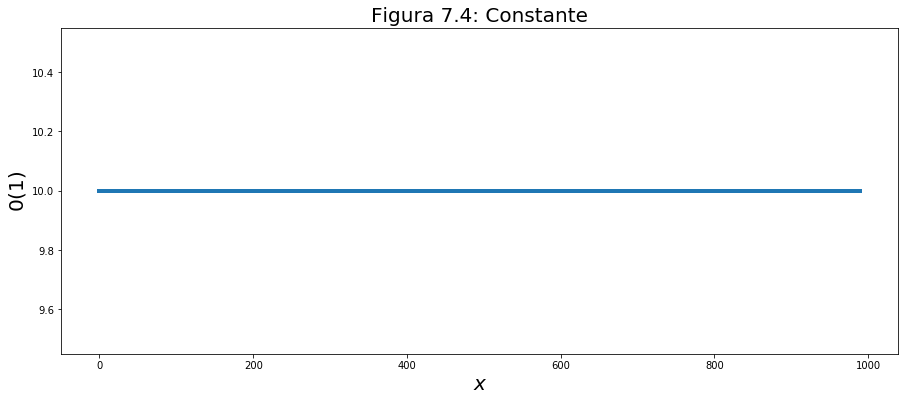

In [33]:
'''El siguiente código muestra cómo se comporta la función fcon al aumentar los datos de entrada de la misma'''

import matplotlib.pyplot as plt # librería para realizar la gráfica

# creación de lista de parametros de entrada
x=[]
for i in range(0,1000,10):
   x.append(i)

# creación de lista con el número de iteracones que ejecuta la función para cada parámetro de entrada.
y=[]
for i in x:
    _comp = 0
    fcon(i)
    y.append(_comp)

# se realiza la figura con los datos obtenidos.
plt.figure(figsize=(15,6))
plt.plot(x,y,linewidth=4.0)
plt.title('Figura 7.4: Constante',size=20)
plt.xlabel('$ x $',size=20)
plt.ylabel('$ 0(1)  $',size=20)
plt.show()

### Complejidad logarítmica

Los algoritmos que exhiben complejidad logarítmica crecen muy lentamente con el crecimiento de sus entradas. La función `intTostr` que aparece en la Figura 7.5 divide por 10 el número `i` de manera repetida para extraer cada uno de sus dígitos. De esta manera, las iteraciones que debe hacer el algoritmo solo cambian con las potencias de 10.

**Figura 7.5**

![instostr](images/intToString.png)

Si extrapolamos la cantidad de iteraciones del algoritmo para diferentes valores de `i`, obtendremos una función logarítmica como la que se muestra en la Figura 7.6.

In [34]:
# Definición de las funciones

def intToStr(i):
    '''Asume que i es un entero no negativo
       Retorna la representación decimal de i en un string'''
    global _comp # variable para mirar la complejidad computacional del algoritmo.
    digits = '0123456789'
    if i==0:
        return 0
    result = ''
    while i > 0:
        result = digits[i%10] + result
        i = i // 10
        _comp += 1 # incremento del número de interaciones
    return result

def addDigits(n):
    '''Asume que n es un entero no negativo
       Retorna la suma de los dígitos de n'''
    global _comp # variable para mirar la complejidad computacional del algoritmo.
    stringRep = intToStr(n)
    val = 0
    for c in stringRep:
        val += int(c)
        _comp += 1 # incremento del número de interaciones
    return val


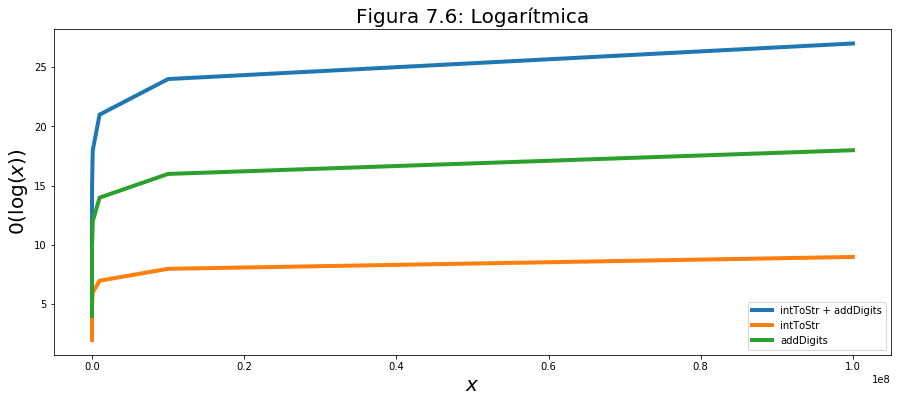

In [35]:
'''El siguiente código muestra cómo se comportan las funciones inToStr y addDigits al aumentar los datos de 
   entrada de la misma'''

# Creación de lista de parametros de entrada (x=[10,100,1000 ... ])
x = []

num=1
for i in range(8):
    num=num*10
    x.append(num)

# Creación de listas con el número de iteraciones que ejecutan las funciones para cada parámetro de entrada.

yf1 = [] # iteraciones de la función intToStr
yf2 = [] # iteraciones de la función addDigits
ytotal = [] # suma de iteraciones de ambas funciones

for i in x:
    # se obtienen las iteraciones que ejecuta la funcion intToStr
    _comp = 0
    intToStr(i)
    yf1.append(_comp)
    aux = _comp
    # se obtienen las iteraciones que ejecuta la funcion addDigits
    _comp = 0
    addDigits(i)
    yf2.append(_comp)
    
    # se realiza la suma de las iteraciones de ambas funciones
    ytotal.append(_comp+aux)
    

# grafica de los resultados

plt.figure(figsize=(15,6))
plt.plot(x,ytotal,linewidth=4.0,label='intToStr + addDigits')
plt.title('Figura 7.6: Logarítmica',size=20)
plt.legend()
plt.plot(x,yf1,linewidth=4.0,label='intToStr')
plt.legend()
plt.plot(x,yf2,linewidth=4.0,label='addDigits')
plt.legend()
plt.xlabel('$ x $',size=20)
plt.ylabel('$ 0( \log(x)) $',size=20)
plt.show()

La Figura 7.5 también muestra la función `addDigits` que a su vez invoca la función `intToStr`. Para analizar la complejidad computacional de `addDigits` es necesario considerar que solamente la complejidad de la línea de código donde se invoca a `intToStr` es $ O(\log(n)) $. Luego, podemos decir que en principio, la complejidad del ciclo `for` depende de la longitud de `stringRep`. Sin embargo, notemos que la complejidad computacional de un algoritmo solo debe ser expresada en términos de sus datos de entrada. Debemos entonces observar que la relación que existe entre la longitud de `stringRep` y la variable de entrada `n` es logarítimica, ya que la longitud de `stringRep` está determinada por la cantidad de iteraciones del ciclo `while` en la función `intToStr`.

Finalmente, la complejidad de `addDigits` la expresamos y simplificamos de la siguiente manera

\begin{equation}
\begin{split}
O(addDigits) & = O( \log(n) ) + O( len(stringRep) ) \\
                  & = O( \log(n) ) + O( \log(n) ) \\
                  & = 2 O( \log(n) ) \\
                  & = O( \log(n) )
\end{split}
\end{equation}

Aquí hemos asumido que la función `int` que se invoca en `addDigits` tiene complejidad constante.

### Complejidad lineal

La complejidad lineal es la más intuitiva. Aquellos algoritmos en los que al duplicar o triplicar el valor (o tamaño) de las entradas, la cantidad de trabajo se duplica o triplica respectivamente, tienen entonces complejidad lineal. Es incluso común para un principiante, asumir que todos los algoritmos tienen complejidad lineal y aunque esto sería una buena noticia, la realidad es distinta pues la mayoría de los algoritmos que hacen parte de programas interesantes, tienen complejidades superiores a la lineal.


**Figura 7.7**

![adddigits](images/addDigits.png)

La Figura 7.7 muestra otra versión de la función `addDigits` que recibe directamente una cadena de caracteres que se recorre en un ciclo `for`, de manera lineal. La cantidad de iteraciones del ciclo es igual a la cantidad de caracteres de la cadena. De nuevo, hemos asumido que `int` tiene complejidad constante.

También en la Figura 7.7, se muestra la función `factorial`, esta vez implementada de manera recursiva, es decir, invocándose a sí misma. Esta recursión actúa también como un proceso cíclico, que en este caso, se repite tantas veces como el valor de `x`. Este es otro ejemplo de un algoritmo de complejidad lineal.

Los algoritmos recursivos, son normalmente más difíciles de diseñar y entender, pero nos llevan a soluciones finalmente simples, elegantes y poderosas. Más adelante veremos un ejemplo con el algoritmo `Mergesort`.

En las Figuras 7.8.1 y 7.8.2 se muestran cómo es el comportamiento de funciones con complejidad computacional lineales, en este caso se analizan las funciones `addDigits`y `factorial`


In [36]:
# Definición de las funciones

def addDigits(s):
    '''Asume que s es un string compuesto por caracteres decimales
       retorna un entero que es la suma de los dígitos en s'''
    global _comp  # variable para mirar la complejidad computacional del algoritmo.
    val=0
    for c in s:
        val += int(c)
        _comp += 1 # incremento del número de interaciones
    return val

def factorial(x):
    '''Asume que x es un entero positivo
       Retorna el factorial de x'''
    global _comp  # variable para mirar la complejidad computacional del algoritmo.
    _comp+=1 # incremento del número de interaciones
    if x == 1:
        return 1
    else:
        return x * factorial(x-1)


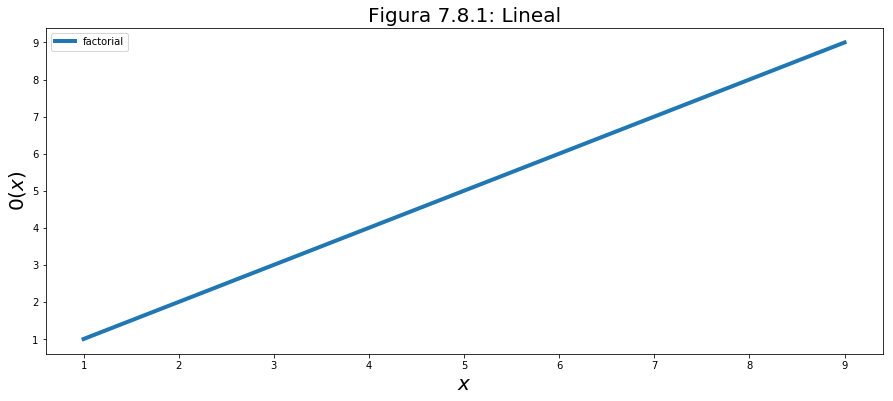

In [37]:
'''El siguiente código muestra cómo se comportan las funciones addDigits y factorial al aumentar los datos de 
   entrada de la misma'''

# creación de lista de parametros de entrada (x = [1, 2, 3, ..., 10])
x = []

for i in range(1,10):
    x.append(i)

y=[] # creación de lista para guardar número de iteraciones

for i in x:
    # se obtienen las iteraciones que ejecuta la funcion factorial()
    _comp = 0
    factorial(i)
    y.append(_comp)
    

# grafica de los resultados

plt.figure(figsize=(15,6))
plt.plot(x,y,linewidth=4.0, label='factorial')
plt.legend()
plt.title('Figura 7.8.1: Lineal',size=20)
plt.xlabel('$ x $',size=20)
plt.ylabel('$ 0(x) $',size=20)
plt.show()

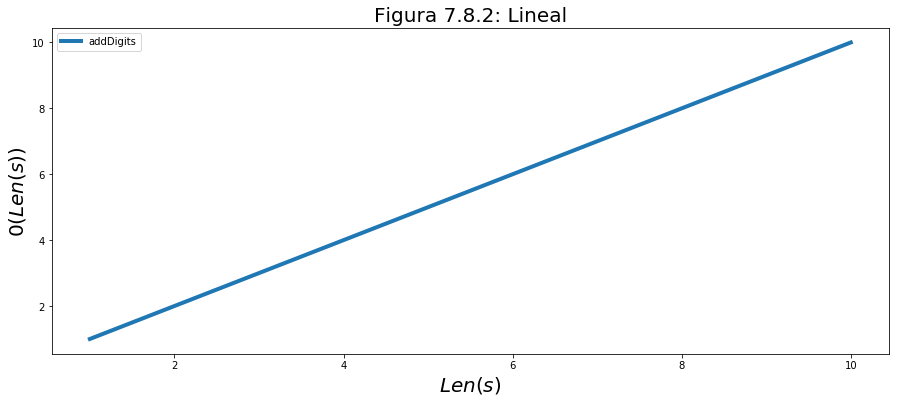

In [38]:
'''Análisis de la complejidad lineal de la función addDigits'''

x = []
lenx = [] # variable para ir guardando las longitudes de los valores de x

# creación de lista de parametros de entrada ( x = ['9', '99', '999', '9999', ...])
num = '9'
for i in range(10):
    x.append(num)
    lenx.append(len(num))
    num += '9'

y=[] # creación de lista para guardar número de iteraciones

for i in x:
    # se obtienen las iteraciones que ejecuta la funcion factorial()
    _comp = 0
    addDigits(str(i))
    y.append(_comp)

# grafica de los resultados

plt.figure(figsize=(15,6))
plt.plot(lenx,y,linewidth=4.0,label='addDigits')
plt.legend()
plt.title('Figura 7.8.2: Lineal',size=20)
plt.xlabel('$ Len(s) $',size=20)
plt.ylabel('$ 0(Len(s)) $',size=20)
plt.show()

### Complejidad superlineal

Los algoritmos de complejidad superlineal o logarítmica-lineal, son el resultado de la combinación de estrategias algorítmicas lineales y logarítmicas, que al multiplicarse, dan como resultado un comportamiento de mayor complejidad al lineal, pero inferior al cuadrático. La Figura 7.9 muestra el crecimiento de una función superlineal.

**Figura 7.9**

![superlineal](images/log-linear.png)

Hay importantes ejemplos de algoritmos de esta clase como `Quicksort` y `Mergesort`. Más adelante estudiaremos este último.

### Complejidad polinomial

Muchos algoritmos caen en esta categoría que por lo general es considerada una mala noticia, es decir, son algoritmos que con incrementos medianos de los datos de entrada, la cantidad de trabajo que hacen crece mucho.

**Figura 7.10**

![intersec](images/intersec.png)


La Figura 7.10 muestra una función que calcula la intersección de dos listas: una lista con los elementos que están tanto en una como en la otra. La función `intersec` se compone de dos partes. La primera consiste en dos ciclos `for` anidados que recorren cada una de las listas. Por cada elemento de `L1`, el `for` interno hace un recorrido completo por la lista `L2`. Eso quiere decir que debemos multiplicar las iteraciones del ciclo externo por las del interno. Es fácil notar que ambos ciclos tienen complejidad lineal con respecto a la longitud de cada lista, así $ O( len(L1) * len(L2) ) $

La segunda parte de `intersec` tiene un ciclo `for` que recorre a `tmp` y un condicional dentro del ciclo con una característica particular. En este `if` se utiliza el operador `not in` para determinar si el elemento `e` no está en `result`. Dado que `result` es una lista que puede crecer hasta el tamaño de `tmp`, que a su vez puede tener el tamaño de `L1` o `L2`, no podemos asumir como constante la complejidad de la operación `not in`, ya que ésta debe hacer una búsqueda en una lista que puede crecer arbitrariamente. Si asumimos que el operador `not in` tiene complejidad lineal en el tamaño de `result`, podemos escribir que

\begin{equation}
\begin{split}
O( intersec(L1, L2) )   & =  O( len(L1) * len(L2) ) + O( len(tmp) * len(result) ) \\
            & =  O( len(L1) * len(L1) ) + O( len(L1) * len(L1) ) \\
            & =  2 * O( len(L1)^{2} ) \\
            & =  O(len(L1)^{2})
\end{split}
\end{equation}

esto teniendo en cuenta que en el peor caso

$$ len(L1) = len(L2) = len(tmp) = len(result) $$

y que la complejidad de `append` es constante.

Decimos entonces que esta es una complejidad computacional cuadrática. Si tuviéramos por ejemplo un ciclo más anidado dentro del ciclo interno de la primera parte de `intersec`, podríamos tener una complejidad cúbica. Tanto a la complejidad cuadrática como a la cúbica las agrupamos en la categoría de polinomiales. La Figura 7.11 muestra el crecimiento de una función cuadrática.

In [39]:
# Definición de la función
def intersec(L1, L2):
    '''Asume que L1 y L2 son listas
       Retorna una lista con la intersección de L1 y L2'''
    global _comp1 # Variable para mirar la complejidad computacional del algoritmo.
    global _comp2
    
    # Construcción de lista con elementos comunes
    tmp = []
    for e1 in L1:
        for e2 in L2:
            _comp1 += 1 # incremento del número de interaciones 1
            if e1 == e2:
                tmp.append(e1)
                
    # Eliminación de duplicados
    result = []
    for e in tmp:
        _comp2 += 1 # incremento del número de interaciones 2
        if e not in result:
            result.append(e)
    return result


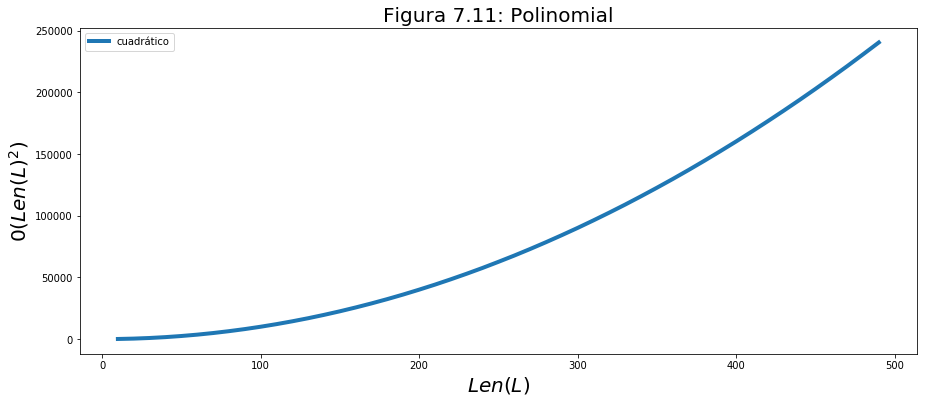

In [40]:
'''El siguiente código muestra cómo se comporta la funcion  intersec al aumentar los datos de 
   entrada de la misma'''

from random import randint

# Lista1 y Lista2 serán listas, las cuales tendrán como elementos otras listas que variarán de tamaño
# estas serán los valores de entrada de la función intersec

Listas1 = []
Listas2 = []
x=[] # Lista para ir almacenando las longitudes de las listas internas de Listas1 y Listas2

for i in range(10,500,10):
    L1 = []
    L2 = []
    for j in range(i):
        L1.append(randint(0,1000)) # Las listas se llenan con valores enteros aleatorios
        L2.append(randint(0,1000))
    x.append(i)
    Listas1.append(L1)
    Listas2.append(L2)

y=[]

for i in range(len(Listas1)):
    _comp1 = 0 # inicialización de contadores
    _comp2 = 0
    intersec(Listas1[i],Listas2[i])
    y.append(_comp1 + _comp2)
    
# grafica de los resultados

plt.figure(figsize=(15,6))
plt.plot(x,y,linewidth=4.0,label='cuadrático')
plt.legend()
plt.title('Figura 7.11: Polinomial',size=20)
plt.xlabel('$ Len(L) $',size=20)
plt.ylabel('$ 0(Len(L)^2) $',size=20)
plt.show()    


### Complejidad exponencial

La función `getBinaryRep` de la Figura 7.12, se compone de dos ciclos no anidados. El primero tiene complejidad $ O(\log(n)) $ debido que `n` controla el ciclo y es dividido por 2 en cada iteración. El segundo ciclo tiene complejidad $ O(numDigits) $, superior entonces a la anterior así que

\begin{equation}
\begin{split}
O(getBinaryRep()) & = O(log(n)) + O(numDigits) \\
        & = O(numDigits)
\end{split}
\end{equation}

La función `genPowerSet` tiene un ciclo principal que tiene una complejidad de $ O(2^{len(L)}) $. Luego hay dos partes significativas. La primera es el llamado a la función `getBinaryRep` que agrega una complejidad de $ O(len(L)) $ y la segunda es un ciclo que tiene complejidad $ O(len(L))$ y tenemos que:

\begin{equation}
\begin{split}
O(genPowerSet())    & = O(2^{len(L)}) * (O( len(L) ) + O(len(L))) \\
                   & = O(2^{len(L)}) * (2 * O(len(L)) \\
                   & = O(2 * 2^{len(L)} * O(len(L)) \\
                   & = O(2^{len(L)})
\end{split}
\end{equation}


La velocidad a la que crece una función exponencial es tan grande que la multiplicación por una función lineal se hace despreciable.

**Figura 7.12**

![binaryrep](images/getBinaryRep.png)

La Figura 7.13 muestra el crecimiento de una función exponencial.

Los algoritmos de complejidad exponencial tienen grandes limitaciones en su uso, ya que incrementos mínimos en sus entradas, la cantidad de trabajo aumenta de manera exagerada.

In [41]:
# Definición de las funciones

def getBinaryRep(n, numDigits):
    '''Asume que n y numDigits son enteros no negativos
    Retorna un string que es la representación binaria
    de n en numDigits bits'''
    result = ''
    while n > 0:
        result = str(n%2) + result
        n = n // 2
    for i in range(numDigits-len(result)):
        result = '0' + result
    return result

def genPowerset(L):
    '''Asume que L es una lista
       Retorna una lista de listas que contiene todas las posibles
       combinaciones de los elementos de L'''
    global _comp
    
    powerset=[]
    for i in range(2**len(L)):
        binStr = getBinaryRep(i, len(L))
        subset = []
        for j in range(len(L)):
            _comp+=1
            if binStr[j] == '1':
                subset.append(L[j])
        powerset.append(subset)
    return powerset


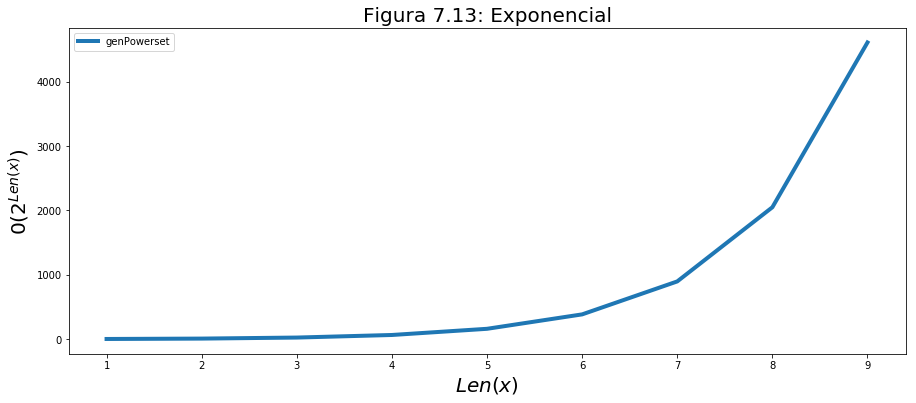

In [42]:
'''El siguiente código muestra cómo se comporta la funcion genPowerset al aumentar los datos de 
   entrada de la misma'''

# creación de lista de parametros de entrada

L = [] # Listas donde se alamcenarán las listas que serán las entradas de la función genPowerSet
x = [] # Variable para almacenar los valores de las longitudes de las listas internas de L

for i in range(1,10):
    L1 = []
    for j in range(i):
        L1.append(randint(0,1000))
    L.append(L1)
    x.append(i)

y=[] # creación de lista para guardar número de iteraciones

for i in L:
    # se obtienen las iteraciones que ejecuta la funcion factorial()
    _comp = 0
    genPowerset(i)
    y.append(_comp)
    

# grafica de los resultados

plt.figure(figsize=(15,6))
plt.plot(x,y,linewidth=4.0, label='genPowerset')
plt.legend()
plt.title('Figura 7.13: Exponencial',size=20)
plt.xlabel('$ Len(x) $',size=20)
plt.ylabel('$ 0(2^{Len(x)}) $',size=20)
plt.show()

<a id='sec7.7'></a>

## 7.7 Búsqueda y ordenamiento

Buscar información es uno de los problemas centrales de la informática. En la gran mayoría de programas se debe hacer algún tipo de búsqueda de datos para cumplir con otra funcionalidad de más alto nivel. Quizás el ejemplo más relevante y cercano para todos es Google.

Aunque la mayoría estamos acostumbrados, lo más impactante de esta herramienta de búsqueda web es su velocidad. Google es tan rápido e inteligente que incluso le sugiere a uno lo que quiere buscar y le muestra resultados antes de que uno termine siquiera de teclear la búsqueda. Para hacernos una idea de la magnitud de esta tarea computacional, tengamos en cuenta que hoy en día (2017) existen aproximadamente 1.195.000.000 sitios web ubicados en por toda la tierra. Si suponemos que cada sitio web tiene en promedio 5 páginas de contenido, que cada página tiene 500 palabras, que acceder a un sitio web se demora 50 ms y que comparar cada palabra se demora 1ns, tendríamos que una búsqueda simple en Google a fuerza bruta tomaría aproximadamente 113 días. Esto es asumiendo que solo hay una persona buscando a la vez y no 38.000 por segundo como es la realidad. Evidentemente, quienes han desarrollado los algoritmos de búsqueda de Google han ido más allá de la fuerza bruta.

**Figura 7.14**

![linearsearch](images/linSearch.png)

La figura 7.14 muestra tres funciones que utilizan diferentes algoritmos de búsqueda. La primera (`linsearch`) utiliza la estrategia más fácil y obtenemos un complejidad lineal en el tamaño del arreglo sobre el cual estamos buscando. La segunda (`ordSearch`) implementa una pequeña optimización para cuando el arreglo de datos está ordenado. Aunque la complejidad asintótica sigue siendo lineal, el caso promedio se vuelve el doble de rápido. Finalmente la función `binSearch` utiliza el algoritmo de búsqueda binaria, que necesita los datos ordenados pero logra reducir la complejidad asintótica a $ O(\log(len(L))) $. Esto nos demuestra que aunque la búsqueda es un proceso computacionalmente costoso, este se puede reducir si los datos están ordenados. *¿Será entonces que vale la pena ordenar los datos antes de hacer la búsqueda?* Esa hipótesis la podemos plantear para la lista `L` con la inecuación

$$ O(sort(L)) + O(fastSearch(L)) < O(slowSearch(L)) $$

donde

\begin{equation}
\begin{split}
O(sort(L)) \leq O(len(L)) & \rightarrow \text {complejidad de ordenar} \\
O(fastSearch(L)) = O(\log(len(L))) & \rightarrow \text {complejidad de buscar en datos ordenados}\\
O(slowSearch(L)) = O(len(L)) & \rightarrow \text {complejidad de buscar en datos desordenados}
\end{split}
\end{equation}

La complejidad de hacer una búsqueda en datos ordenados y desordenados la vimos en la Figura 7.14. La complejidad de ordenar no la hemos calculado pero es fácil darse cuenta de que para ordenar una lista de elementos es necesario como mínimo recorrer toda la lista, es decir que podemos estar seguros de que la complejidad es como mínimo lineal. Reemplazando obtenemos

$$ O(len(L)) + O(\log(len(L))) < O(len(L)) $$

lo  cual nos lleva a concluir que la inecuación no puede ser correcta. Sin embargo, si necesitamos hacer muchas búsquedas, la complejidad de ordenar pesará cada vez menos

$$ O(len(L)) + k*O(\log(len(L))) < k*O(len(L)) $$

De hecho, una de las estrategias que utiliza Google consiste en mantener datos previamente ordenados sobre los sitios web para poder hacer búsquedas más rápidas.

### Ordenamiento por selección

La Figura 7.15 muestra una función que implementa el algoritmo conocido como `Selection sort`. En cada iteración del ciclo externo, se hacer recorrido por la lista para buscar el elemento menor y ponerlo al principio. La Figura 7.15 también muestra una prueba paso a paso del algoritmo. La complejidad asintótica de `Selection sort` es $ O(len(L)^{2}) $, por lo que no es conveniente utilizarlo para ordenar grandes cantidades de datos.

**Figura 7.15**

![selSort](images/selSort.png)

![tabla1](images/table.png)


### Ordenamiento por mezcla

Este algoritmo, creado por John von Neumann en 1945, utiliza una idea general que está presente en muchos algoritmos eficientes: divide y vencerás. El algoritmo parte de observar que dos listas ordenadas pueden mezclarse, generando una nueva lista ordenada en tiempo lineal, como se muestra en la Figura 7.16.

**Figura 7.16**

![tabla3](images/table2.png)

La Figura 7.17 muestra la función merge que implementa el algoritmo descrito.

**Figura 7.17**

![merge](images/merge.png)

Finalmente la Figura 7.18 muestra el algoritmo `Mergesort` (ordenamiento por mezcla) en su implementación recursiva. En cada iteración recursiva, siempre que la lista tenga al menos dos elementos, ésta será partida en dos mitades hasta llegar a tener listas de un solo elemento. Cada pareja de listas se combina para generar una lista ordenada con la función merge. La repetición de este proceso de manera recursiva nos lleva al ordenamiento total de la lista inicial.

**Figura 7.18**

![mergesort](images/mergeSort.png)

Note que la complejidad del proceso iterativo recursivo es logarítmico, ya que en cada iteración, la lista de divide en dos. Además, en cada iteración debe hacerse una mezcla que, como vimos, tiene complejidad lineal. Es así como concluimos que la complejidad asintótica de `Mergesort` es 

$$ O(\log(len(L))*len(L))$$

La Figura 7.19 muestra un ejemplo del proceso de ordenamiento por mezcla.


**Figura 7.19**

![tree](images/tree.png)